# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import  multivariate_normal, logistic
from utils.RegressionModel import RegressionModel
from utils.GenerativeModel import GenerativeModel
from utils.LDA import LDA
from utils.LogisticRegression import LogisticRegression
from utils.QDA import QDA

#### Load datasets sets

In [2]:
train_A = pd.read_table("data/classificationA.train", header=None)
train_B = pd.read_table("data/classificationB.train", header=None)
train_C = pd.read_table("data/classificationC.train", header=None)
test_A = pd.read_table("data/classificationA.test", header=None)
test_B = pd.read_table("data/classificationB.test", header=None)
test_C = pd.read_table("data/classificationC.test", header=None)

print "Shape train A : ", train_A.shape
print "Shape train B : ", train_B.shape
print "Shape train C : ", train_C.shape

print "Shape test A : ", test_A.shape
print "Shape test B : ", test_B.shape
print "Shape test C : ", test_C.shape

print "A - 1: " + str(len(train_A.loc[train_A[2]==1])) + " - 0: " + str(len(train_A.loc[train_A[2]==0]))
print "B - 1: " + str(len(train_B.loc[train_B[2]==1])) + " - 0: " + str(len(train_B.loc[train_B[2]==0]))
print "C - 1: " + str(len(train_C.loc[train_C[2]==1])) + " - 0: " + str(len(train_C.loc[train_C[2]==0]))

train_A = train_A.values
train_B = train_B.values
train_C = train_C.values

Shape train A :  (150, 3)
Shape train B :  (300, 3)
Shape train C :  (400, 3)
Shape test A :  (1500, 3)
Shape test B :  (2000, 3)
Shape test C :  (3000, 3)
A - 1: 50 - 0: 100
B - 1: 150 - 0: 150
C - 1: 250 - 0: 150


In [3]:
train = {'A': train_A, 'B': train_B, 'C': train_C}
test = {'A': test_A, 'B': train_B, 'C': train_C}
missclassification = {'train': {}, 'test': {}}

## 1. Generative model (LDA)

$$y ∼ \mathcal{B}(\pi),\enspace x|\{y = i\} ∼ \mathcal{N}(\mu_{i}, \Sigma). $$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\hat{\Sigma}=\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=0\}}(x_{i}-\hat{\mu}_{0})(x_{i}-\hat{\mu}_{0})^{T}+\mathbb{1}_{\{y_{i}=1\}}(x_{i}-\hat{\mu}_{1})(x_{i}-\hat{\mu}_{1})^{T}$$

$$p(y=1|x)=\frac{1}{2} \Leftrightarrow x\perp\Sigma^{-1}(\mu_{1}-\mu_{0})$$

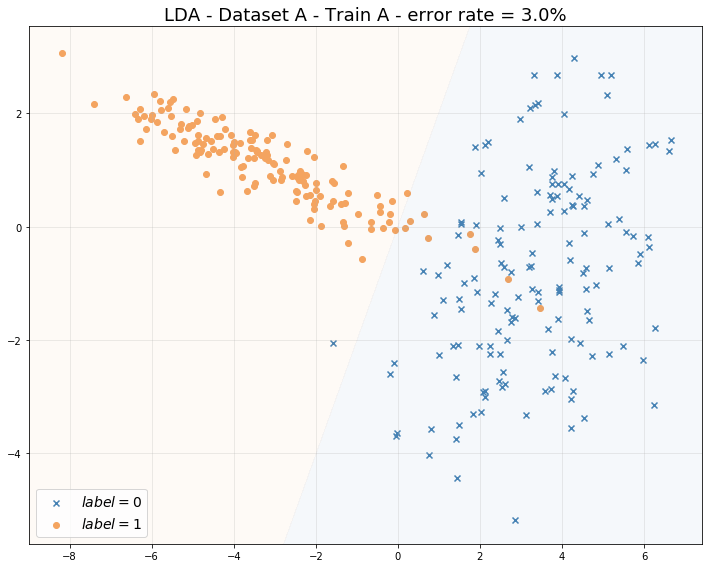

In [24]:
X = train['B'][:,:2]
y = train['B'][:,-1]
lda = LDA()
lda.fit(X, y)
missclassification_rate = round(100*lda.missclassification(X, y),3)
title ="LDA - Dataset A - Train A - error rate = " + str(missclassification_rate) + "%"
lda.plot_pred(X, y, title=title)
plt.show()

## 2. Logistic regression

$$ Y\,|\,X \sim \mathcal{B}\left(\sigma(w^{T}X+b)\right)$$

$$\mathcal{L}(\beta, w) = \ell(w) + \frac{\beta}{2}\|w\|^{2}$$

$$\nabla\mathcal{L}(\beta, w) = \nabla\ell(w) + \beta w$$

$$H\mathcal{L}(\beta, w) = H\ell(w) + \beta I$$

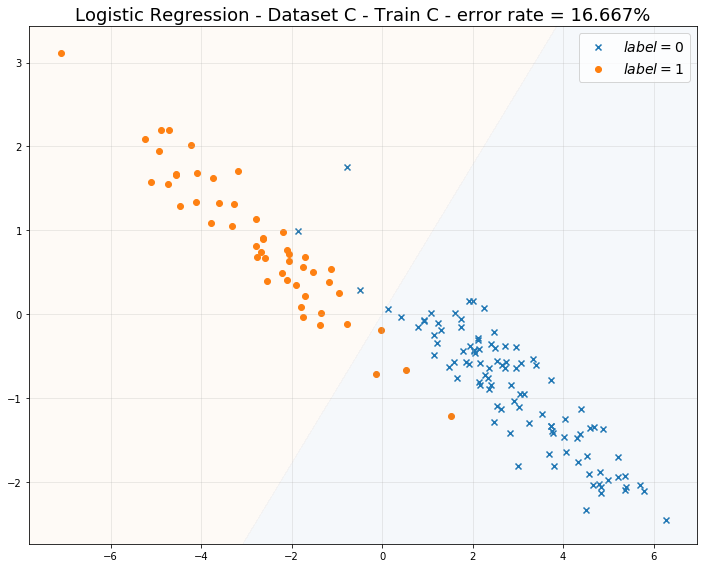

In [36]:
X = train['A'][:,:2]
y = train['A'][:,-1]
logreg = LogisticRegression()
logreg.fit(X, y)
missclassification_rate = round(100*logreg.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
logreg.plot_pred(X, y, title=title)
plt.show()

$$ Y\,|\,X\sim\mathcal{N}\left(w^{T}X,\sigma^{2}\right) $$

## 3. Linear regression

$$ \hat{w} = (X^{T}X)^{-1}X^{T}y $$

In [8]:
class LinearRegression(object):
    @staticmethod
    def augment_matrix(X):
        num_samples, num_features = X.shape
        X_aug = np.hstack([np.ones((num_samples, 1)), X])
        return X_aug
    
    def __init__(self):
        self.w_=None
        self.sigma_=None
        
    def init_params_(self, X):
        num_samples, num_features = X.shape
        X = np.hstack([np.ones((num_samples, 1)), X])
        self.w_ = np.random.randn(num_features+1)
        return X
    
    def fit(self, X, y):
        X = self.init_params_(X)
        XT_X = np.matmul(X.T, X)
        try :
            XT_X_inv = np.linalg.inv(XT_X)
            XT_X_inv_XT = np.matmul(XT_X_inv, X.T)
            self.w_ = np.matmul(XT_X_inv_XT, y)
        except np.linalg.LinAlgError :
            raise np.linalg.LinAlgError("X not invertible")
        self.sigma_ = np.mean((y-np.matmul(X, self.w_))**2)
            
    def predict(self, X):
        try :
            X = LinearRegression.augment_matrix(X)
            y_pred = np.matmul(X,self.w_)
            return y_pred
        except TypeError:
            raise RuntimeError("Unfitted model")
            
#     def plot_pred(self, X, y, title="", figsize=(10,8)):
#         fig, ax = plt.subplots(figsize=figsize)
#         X_0 = X[y==0]
#         X_1 = X[y==1]
#         ax.scatter(*X_0.T, marker='o', label = r"$label=0$")
#         ax.scatter(*X_1.T, marker='x', label = r"$label=1$")
#         x1_boundary = np.linspace(*ax.get_xlim())
#         x2_boundary = -self.w_[0]*x1_boundary/self.w_[1]
#         ax.plot(x1_boundary, x2_boundary, '--', color="dimgrey")
#         ax.grid(alpha=0.3)
#         ax.set_title(title)
#         plt.legend(fontsize=14)
#         return ax
        
    def plot_pred(self, X, y, title="", figsize=(10,8)):
        fig, ax = plt.subplots(figsize=figsize)
        X_0 = X[y==0]
        X_1 = X[y==1]
        ax.scatter(*X_0.T, marker='o', label = r"$label=0$")
        ax.scatter(*X_1.T, marker='x', label = r"$label=1$")
        
        x1_axis = np.linspace(*ax.get_xlim())
        x2_axis = np.linspace(*ax.get_ylim())
        granularity = len(x1_axis)
        x1_grid, x2_grid = np.meshgrid(x1_axis, x2_axis)
        x_1_2 = np.vstack([x1_grid.reshape(-1), x2_grid.reshape(-1)]).T
        
        z = self.w_[0]*x1_grid + self.w_[1]*x2_grid
        z = z.reshape(granularity,granularity)
        
        ax.contourf(x1_axis, x2_axis, z, levels=[0,np.inf], colors="steelblue", linestyles="dashed", alpha=0.05)
        ax.contourf(x1_axis, x2_axis, -z, levels=[0,np.inf], colors="sandybrown", linestyles="dashed", alpha=0.05)
        ax.grid(alpha=0.3)
        ax.set_title(title)
        plt.legend(fontsize=14)
        return ax

In [ ]:
X = train['A'][:,:2]
y = train['A'][:,-1]
linreg = LogisticRegression()
linreg.fit(X, y)
missclassification_rate = round(100*linreg.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
logreg.plot_pred(X, y, title=title)
plt.show()

In [9]:
lin_reg = LinearRegression()

In [68]:
X = train_C[:,:2]
y = train_C[:,-1]
lin_reg.fit(X, y)

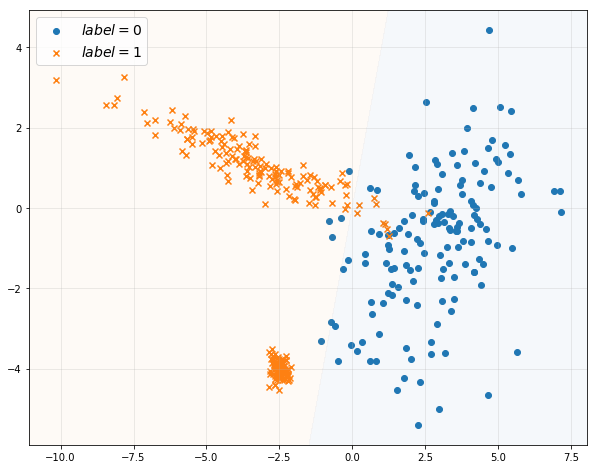

In [69]:
ax = lin_reg.plot_pred(X,y)

## 5. QDA model

$$ Y\sim\mathcal{B}(\pi), \enspace X\,|\,Y\!=\!i\sim\mathcal{N}\left(\mu_{i}, \Sigma_{i}\right)$$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\forall j\in\{0,1\}, \enspace\hat{\Sigma}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow\frac{1}{2}\log\left(\frac{\det \Sigma_{1}^{-1}}{\det \Sigma_{0}^{-1}}\right)+\frac{1}{2}\left[(x-\mu_{1})^{T}\Sigma_{1}^{-1}(x-\mu_{1})-(x-\mu_{0})^{T}\Sigma_{0}^{-1}(x-\mu_{0})\right] = \log\left(\frac{\pi}{1-\pi}\right)$$

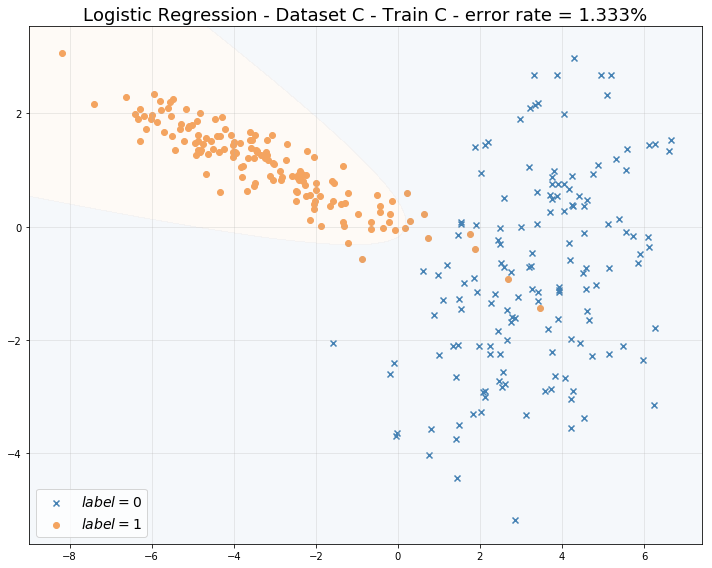

In [5]:
X = train['B'][:,:2]
y = train['B'][:,-1]
qda = QDA()
qda.fit(X, y)
missclassification_rate = round(100*qda.missclassification(X, y),3)
title ="Logistic Regression - Dataset C - Train C - error rate = " + str(missclassification_rate) + "%"
qda.plot_pred(X, y, title=title)
plt.show()